In [2]:
import matplotlib.pyplot as plt
import numpy as np


from aart_func import *
import params
from params import * # The file params.py contains all the relevant parameters for the simulations
from astropy import units as u
import kgeo
import image_tools as tls
import subprocess
import scipy.interpolate

from matplotlib import ticker
from matplotlib.lines import Line2D

%load_ext autoreload
%autoreload 2
import importlib 
from functools import partial

In [45]:
t = np.zeros(3)
t[2] = 100
t = np.vstack((t,np.array([2,2,2])))
print(t)
# print("_________")
# t = np.delete(t,0,0)
# print(t)
peak = np.argmax(t,1)
print(np.argmax(peak==0))
if not np.all((peak==0) == False):
    print("Not All False")
peak = np.delete(peak,np.argmax(peak==0))
print(peak)

[[  0.   0. 100.]
 [  2.   2.   2.]]
1
Not All False
[2]


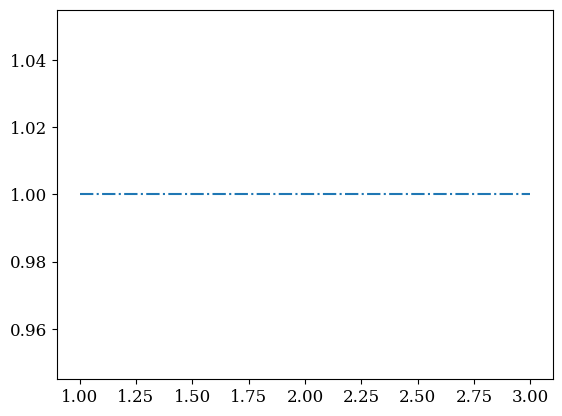

In [49]:
plt.plot([1,2,3],[1,1,1],linestyle="-.")